<a href="https://colab.research.google.com/github/praveenraghuvanshi1512/EVA4/blob/Session-11/Session-11/Assignment-11/EVA_4_S11_Praveen_Raghuvanshi_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Steps Summary

In [0]:
# 1. Mount google drive
# 2. Set the directory path of google drive
# 3. Load and Import all modules and libraries
# 4. Set Device
# 5. Import all the functions
# 6. Load transformations
# 7. Load dataset
# 8. Load Classes
# 9. Display sample images
# 10. Load Resnet18 Model
# 11. Define Loss function and optimizer
# 12. Run train and test
# 13. Grad-CAM
# 14. Misclassified images

### 1. Mount google drive

In [0]:
# Load data from Google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### 2. Set the directory path of google drive

In [0]:
import sys
%load_ext autoreload
%autoreload 2
sys.path.append('/content/drive/My Drive/eva-4/assignment-10')
sys.path.append('/content/drive/My Drive/eva-4/assignment-10/models')
sys.path.append('/content/drive/My Drive/eva-4/assignment-10/gradcam')
sys.path.append('/content/drive/My Drive/eva-4/assignment-10/sampleimages')
sys.path.append('/content/drive/My Drive/eva-4/assignment-10/misclassified')

In [0]:
cd '/content/drive/My Drive/eva-4/assignment-10'

/content/drive/My Drive/eva-4/assignment-10


In [0]:
ls

augmentation.py  learningrate.py  outputs/      S10_functions.py
data/            misclassified/   plotutils.py  sampleimages/
gradcam/         models/          __pycache__/  utils.py


### 3. Load and Import all modules and libraries

In [0]:
!pip install torchsummary

In [0]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-27ldaxsi
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-27ldaxsi
     |████████████████████████████████| 634kB 2.8MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64574 sha256=4cb35b90a00c6cab85a6b65a3084a869741a90fe6a9c4638266845ee8f86b9bf
  Stored in directory: /tmp/pip-ephem-wheel-cache-cs11iax4/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=0679da806e0154410302341496af00b2ce4c4f80af1141effde845b7d36842ec
  Stored in directory: /tmp/pip-ephem-wheel-cache-cs11iax4/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: album

In [0]:
!pip install torch-lr-finder -v --global-option="amp"

/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-aci49jef
Created temporary directory: /tmp/pip-req-tracker-4k6h0269
Created requirements tracker '/tmp/pip-req-tracker-4k6h0269'
Created temporary directory: /tmp/pip-install-rw4jmzdm
1 location(s) to search for versions of torch-lr-finder:
* https://pypi.org/simple/torch-lr-finder/
Getting page https://pypi.org/simple/torch-lr-finder/
Found index url https://pypi.org/simple
Looking up "https://pypi.org/simple/torch-lr-finder/" in the cache
Request header has "max_age" as 0, cache bypassed
Starting new HTTPS connection (1): pypi.org:443
https://pypi.org:443 "GET /simple/torch-lr-finder/ HTTP/1.1" 200 807
Updating cache with response from "https://pypi.org/simple/torch-lr-finder/"
Caching due t

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
from torchvision.utils import make_grid
from torchsummary import summary

### 4. Set Device

In [0]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


###  5. Import all the functions

In [0]:
from model import Net, ResNet, resnet18
from S10_functions import myfunc, transformations, loadcifar10dataset, getclasses, display, train, test, imshow, loadimage, saveimage
from S10_functions import getloss, getoptimizer, getscheduler
from gradcam import GradCAM, GradCAMpp, applygradcam
from gradcam_utils import Normalize, visualize_cam
from learningrate import findandplotlearningrate
from plotutils import plotimages, plotmisclassifiedimages, savemisclassifiedimages, plotmisclassifiedgradcamimages, plotmetrics 

  pip install torch-lr-finder -v --global-option="amp"


###  6. Load Transformations

In [0]:
transform_train, transform_test = transformations()

###  7. Load Dataset

In [0]:
trainset, trainloader, testset, testloader = loadcifar10dataset(transform_train, transform_test)
print(trainloader)

Files already downloaded and verified
Files already downloaded and verified


###  8. Load Classes

In [0]:
classes = getclasses()
print(classes)

('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


### 9. Display sample images

###### Sample Training Images

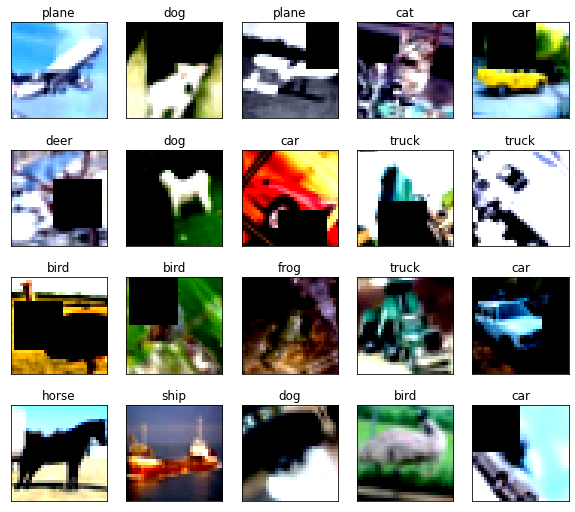

In [0]:
plotimages(device, classes, trainloader, 20)

###### Sample Test Images

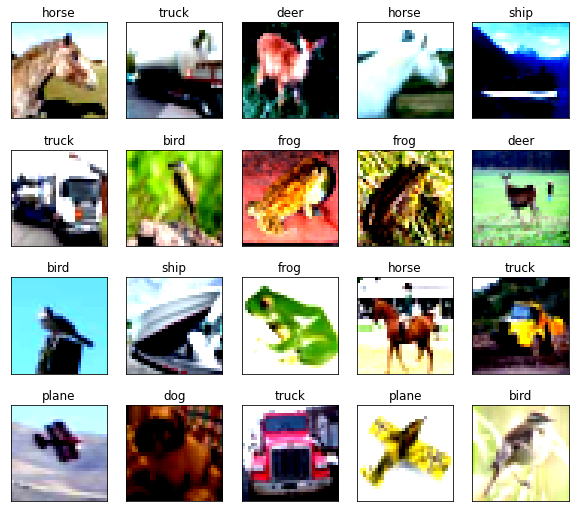

In [0]:
plotimages(device, classes, testloader, 20)

### 10. Load Resnet18 Model


In [0]:
print("Building Model")
net = resnet18()

Building Model


In [0]:
# Display Model Summary
model = net.to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

### 11. Define loss function and optimizer


In [0]:
criterion = getloss()

##### Find Learning Rate

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()



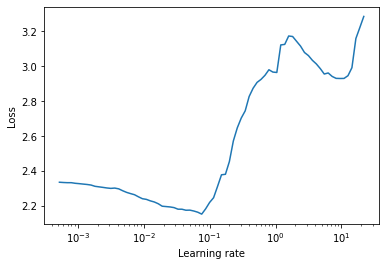

Min loss value is : 2.1526104272658277 
Min LR value is   : 0.0001318257


In [0]:
findandplotlearningrate(model, trainloader, criterion, 0.9)

In [0]:
optimizer = getoptimizer(net, lr=0.05, momentum=0.9)
scheduler = getscheduler(optimizer)

### 12. Run Train and Test

In [0]:
trainaccuracies = []
trainlosses = []
vallosses = []
valaccuracies = []

In [0]:
for epoch in range(1, 50):
    train(net, trainloader, device, optimizer, criterion, trainaccuracies, trainlosses, epoch)
    testloss = test(net, testloader, device, criterion, valaccuracies, vallosses, epoch)
    scheduler.step(testloss)


Epoch: 1
 [================================================================>]  Step: 51ms | Tot: 35s366ms | Train >> Loss: 1.718 | Acc: 38.028% (19014/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 3s414ms | Test >> Loss: 1.352 | Acc: 51.130% (5113/10000) 79/79 
0.010683367395401001

Epoch: 2
 [================================================================>]  Step: 52ms | Tot: 34s916ms | Train >> Loss: 1.343 | Acc: 51.278% (25639/50000) 391/391 
 [================================================================>]  Step: 20ms | Tot: 3s610ms | Test >> Loss: 1.192 | Acc: 57.840% (5784/10000) 79/79 
0.009416869270801544

Epoch: 3
 [================================================================>]  Step: 55ms | Tot: 34s990ms | Train >> Loss: 1.150 | Acc: 58.688% (29344/50000) 391/391 
 [================================================================>]  Step: 22ms | Tot: 3s459ms | Test >> Loss: 0.979 | Acc: 65.500% (6550/10000) 79

#### Plot Metrics - Accuracy and Loss

49
49


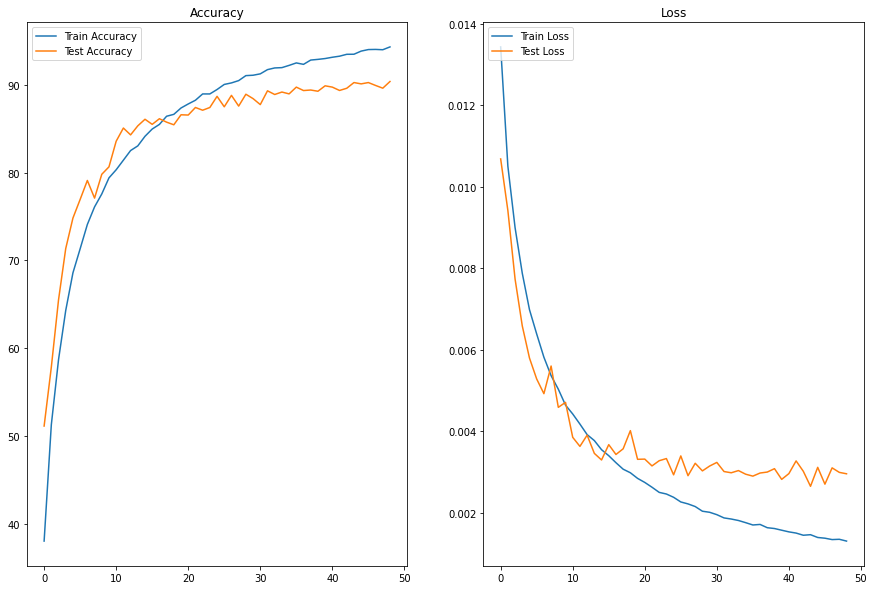

In [0]:
plotmetrics(trainaccuracies, valaccuracies, trainlosses, vallosses, savefilename="metrics")

### 13. Grad-CAM


##### Image 1: Car with a girl

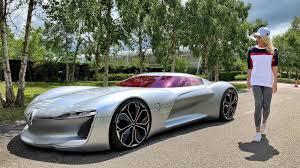

In [0]:
# Load Image
imagename = 'car.jpg'
imagedir = '/content/drive/My Drive/eva-4/assignment-10/sampleimages'
pil_img = loadimage(imagedir, imagename)
pil_img

In [0]:
imgs, temps = applygradcam(pil_img, model, imagedir, imagename)

saliency_map size : torch.Size([4, 4])


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


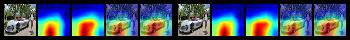

In [0]:
pilimg = saveimage(temps, '/content/drive/My Drive/eva-4/assignment-10/outputs', imagename)
pilimg

##### Image-2: Dog

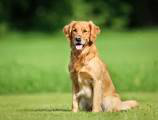

In [0]:
# Load Image
imagename2 = 'dog.jpg'
pil_img2 = loadimage('/content/drive/My Drive/eva-4/assignment-10/sampleimages', imagename2)
pil_img2

In [0]:
imgs2, temp3 = applygradcam(pil_img2, model, imagedir, imagename2)

saliency_map size : torch.Size([4, 4])


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


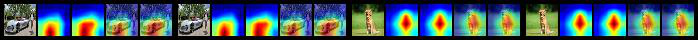

In [0]:
pilimg2 = saveimage(temp3, '/content/drive/My Drive/eva-4/assignment-10/outputs', imagename2)
pilimg2

### 14. Misclassified images

#### Get Misclassified Images

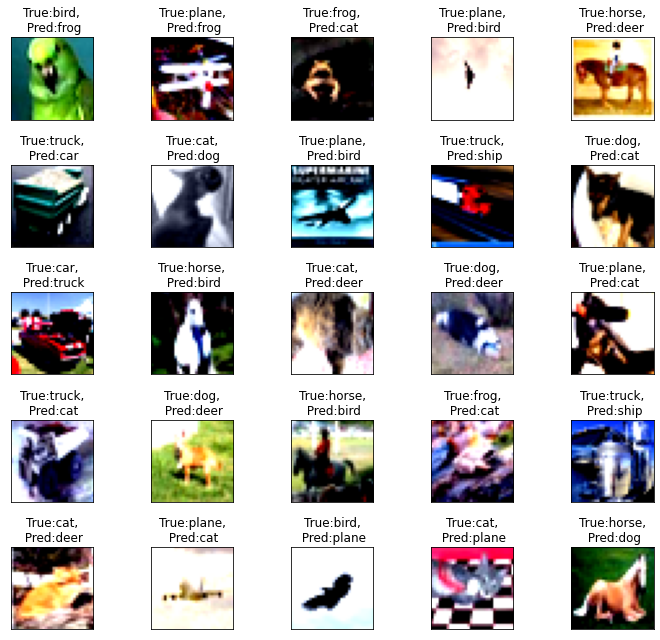

In [0]:
misclassifieddirectory = '/content/drive/My Drive/eva-4/assignment-10/misclassified'
names, titles = savemisclassifiedimages(model, device, classes, testloader, misclassifieddirectory, 25)

#### Apply Gradcam

In [0]:
misclassifiedgradcamimages = []
imagedir = '/content/drive/My Drive/eva-4/assignment-10/misclassified'

for name in names:
  pil_img = loadimage(imagedir, name)
  imgs2, misclassifiedgradcamimages = applygradcam(pil_img, model, imagedir, name)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])


#### Display Misclassified GradCam Images

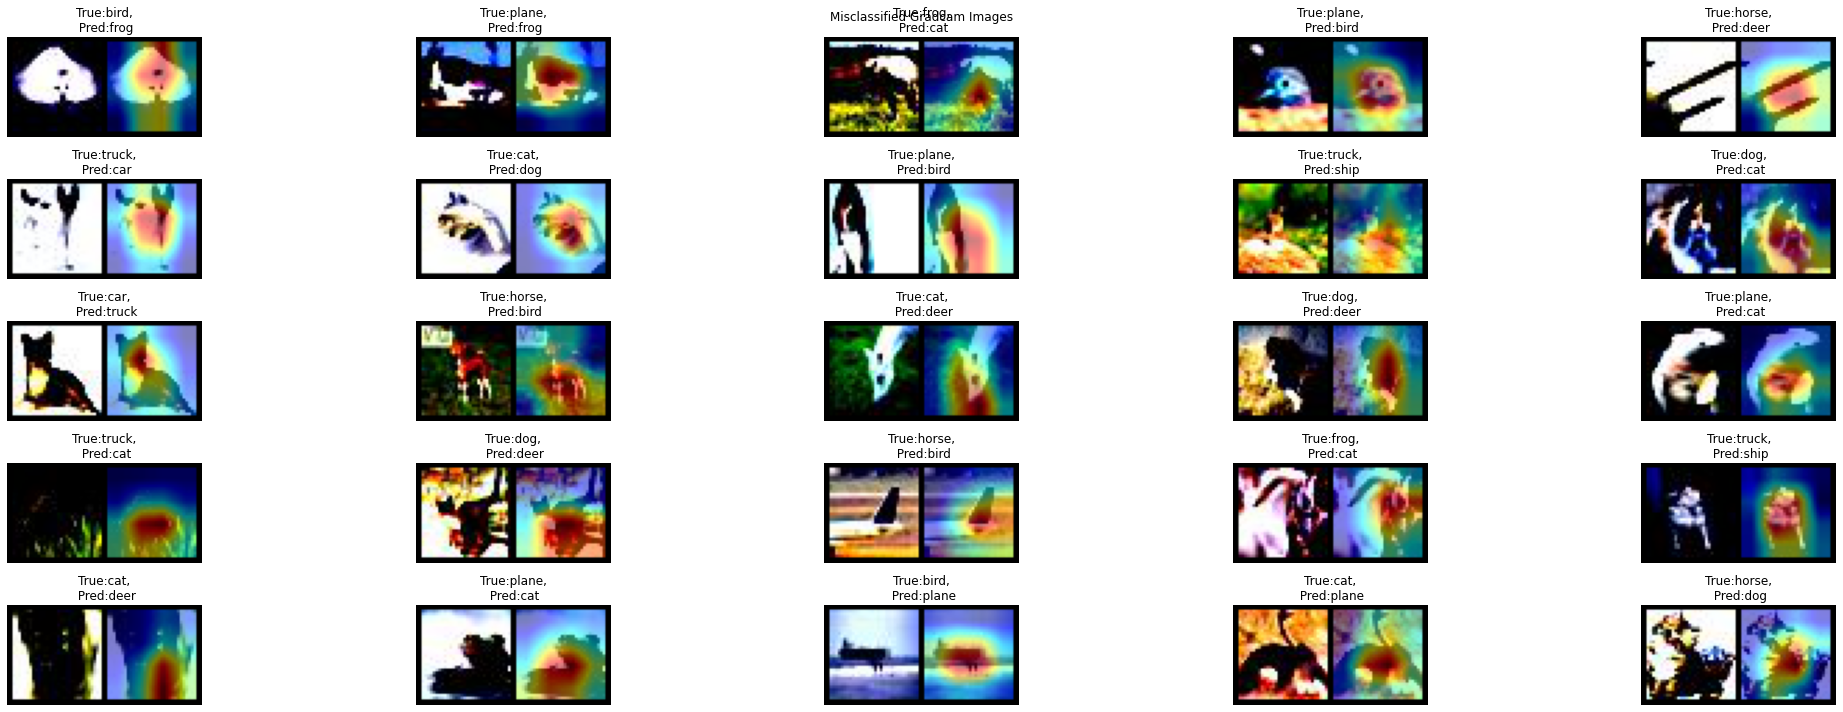

In [0]:
plotmisclassifiedgradcamimages(misclassifiedgradcamimages, titles, "misclassifiedgradcamimages")

### 15. Analysis
- No of Epochs : 50
- Batch size : 128
- Best Test  Acc: 90.370%
- Best Train Acc: 94.310%
- No Model changes in Resnet18
- Cutout : Yes
- Hyperparameters
  - Optimizer: SGD
  - Learning rate: 0.05
  - Momentum: 0.9